<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/labs/lab02_srs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2
## Scott Spurlock 
### 2/10/2021
Experiment with numpy and matplotlib

In [1]:
import numpy as np

# Load the file into a numpy array, skipping the first (header) row.
poptable = np.loadtxt('lab02_populations.csv', skiprows=1, delimiter=',', dtype=int)
# remove duplicate rows and row with bad data
poptable = np.delete(poptable, (11, 12, 23), axis=0)
print(poptable)
# This shows the year, number of hares, number of lynxes, and number of carrots


[[ 1900 30000  4000 48300]
 [ 1901 47200  6100 48200]
 [ 1902 70200  9800 41500]
 [ 1903 77400 35200 38200]
 [ 1904 36300 59400 40600]
 [ 1905 20600 41700 39800]
 [ 1906 18100 19000 38600]
 [ 1907 21400 13000 42300]
 [ 1908 22000  8300 44500]
 [ 1909 25400  9100 42100]
 [ 1910 27100  7400 46000]
 [ 1911 40300  8000 46800]
 [ 1912 57000 12300 43800]
 [ 1913 76600 19500 40900]
 [ 1914 52300 45700 39400]
 [ 1915 19500 51100 39000]
 [ 1916 11200 29700 36700]
 [ 1917  7600 15800 41800]
 [ 1918 14600  9700 43300]
 [ 1919 16200 10100 41300]
 [ 1920 24700  8600 47300]]


## Print out the number of rows and columns in poptable. 

In [2]:
print('shape:', poptable.shape)

shape: (21, 4)


## Print out the min, max, and average number of hares, lynxes, and carrots.

In [3]:
print('Min hares, lynxes, carrots')
print(poptable[:, 1:].min(axis=0))

print('\nMax hares, lynxes, carrots')
print(poptable[:, 1:].max(axis=0))

print('\nAvg hares, lynxes, carrots')
print(poptable[:, 1:].mean(axis=0))

Min hares, lynxes, carrots
[ 7600  4000 36700]

Max hares, lynxes, carrots
[77400 59400 48300]

Avg hares, lynxes, carrots
[34080.95238095 20166.66666667 42400.        ]


## Print out all the years when hare population was above 40000.

In [4]:
print(poptable[poptable[:, 1] > 40000, 0])


[1901 1902 1903 1911 1912 1913 1914]


# Plotting

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## Plot the number of hares, lynxes, and carrots over time (3 curves on one graph). Include a title, axis labels and a legend.

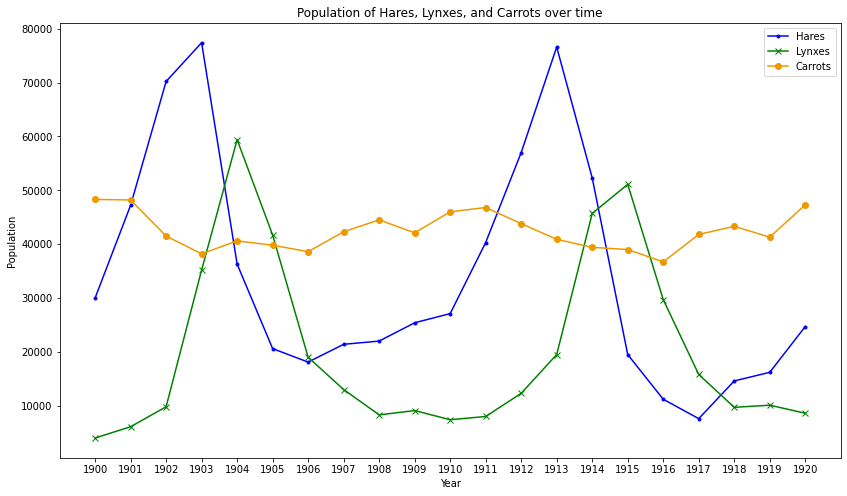

In [6]:
year, hares, lynxes, carrots = poptable.T
plt.figure(figsize=(14, 8))
plt.plot(year, hares, '.-b', label='Hares')
plt.plot(year, lynxes, 'x-g', label='Lynxes')
plt.plot(year, carrots, 'o-', color='#ee9900', label='Carrots')
plt.legend()
plt.ylabel('Population')
plt.xlabel('Year')
plt.xticks(np.arange(year.min(), year.max()+1, dtype=int))
plt.title('Population of Hares, Lynxes, and Carrots over time')
plt.show()

## Show a histogram for number of carrots. Use a bin size of 8.

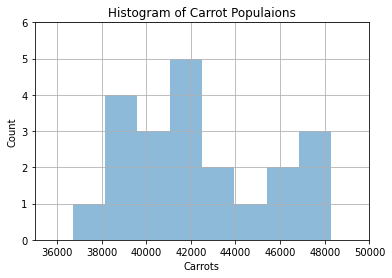

In [7]:
plt.hist(carrots, bins=8, alpha=0.5)
plt.xlabel('Carrots')
plt.ylabel('Count')
plt.title('Histogram of Carrot Populaions')
plt.axis([35000, 50000, 0, 6])
plt.grid(True)

## Show a scatter plot of number of hares vs. number of lynxes.
### Key point: there is only one series on the graph.

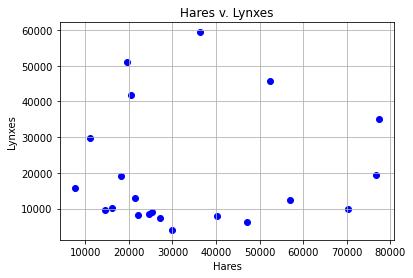

In [8]:
plt.scatter(hares, lynxes, color="blue", marker="o")
plt.xlabel('Hares')
plt.ylabel('Lynxes')
plt.title('Hares v. Lynxes')
plt.grid(True)

No, population of lynxes and hares do not appear to be correlated based on this graph.

In [9]:
# We could also check the correlation coefficient: 0.07 is not very correlated
np.corrcoef(hares, lynxes)

array([[1.        , 0.07189206],
       [0.07189206, 1.        ]])

## Challenge: show a scatter plot of number of hares vs number of lynxes from 2 years later.

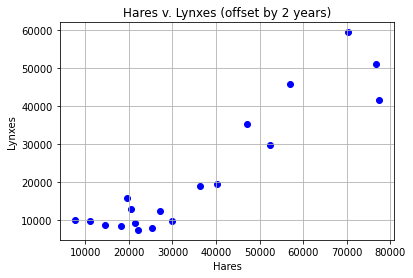

In [10]:
plt.scatter(hares[:-2], lynxes[2:], color="blue", marker="o")
plt.xlabel('Hares')
plt.ylabel('Lynxes')
plt.title('Hares v. Lynxes (offset by 2 years)')
plt.grid(True)

In [11]:
# Correlation is stronger for the offset relationship: 0.9273
np.corrcoef(hares[:-2], lynxes[2:])

array([[1.       , 0.9273333],
       [0.9273333, 1.       ]])

## Challenge: show a grouped bar chart with years on the x axis and population on the y axis. For each year, show 3 bars (one for hares, lynxes, and carrots). For help with making a grouped bar chart, see: https://python-graph-gallery.com/11-grouped-barplot/


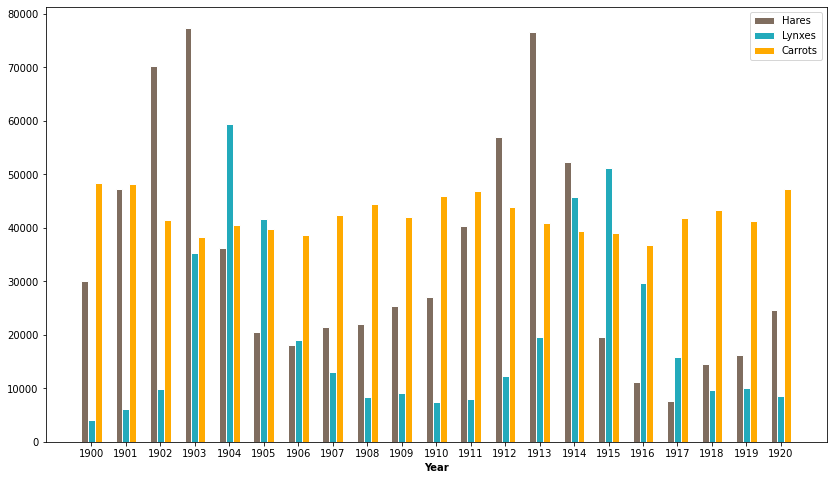

In [12]:
# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = hares
bars2 = lynxes
bars3 = carrots
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.figure(figsize=(14, 8))
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Hares')
plt.bar(r2, bars2, color='#22aabb', width=barWidth, edgecolor='white', label='Lynxes')
plt.bar(r3, bars3, color='#ffaa00', width=barWidth, edgecolor='white', label='Carrots')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], year.astype(int))
 
# Create legend & Show graphic
plt.legend()
plt.show()
